# 1: Setup & Import Libraries

In [1]:
# ========================================
# PART 1: Import Libraries
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Settings
warnings.filterwarnings('ignore')  # Hide warning messages
plt.style.use('seaborn-v0_8-darkgrid')  # Nice style for charts
sns.set_palette("husl")  # Colorful palette

# Make charts look professional
plt.rcParams['figure.figsize'] = (12, 6)  # Default chart size
plt.rcParams['font.size'] = 11  # Font size
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# 2: Load Data

In [2]:
# ========================================
# PART 2: Load Dataset
# ========================================

df = pd.read_csv('StudentPerformanceFactors.csv')

# Show basic info
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Total Students: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
display(df.head())

print("\n" + "=" * 60)
print("COLUMN DATA TYPES")
print("=" * 60)
print(df.dtypes)


DATASET OVERVIEW
Total Students: 6,607
Total Columns: 20
Memory Usage: 5.43 MB

FIRST 5 ROWS


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



COLUMN DATA TYPES
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


# 3: Data Cleaning - Check Missing Values

MISSING VALUES CHECK
                  Column  Missing_Count  Missing_Percent
Parental_Education_Level             90         1.362192
         Teacher_Quality             78         1.180566
      Distance_from_Home             67         1.014076


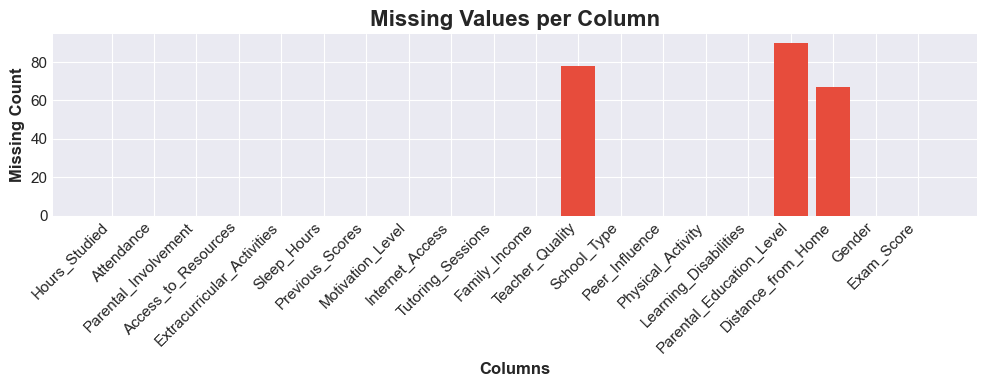


Missing values check completed!


In [5]:
# ========================================
# PART 3: Data Cleaning - Missing Values
# ========================================

print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)

missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

if len(missing_df) == 0:
    print("NO MISSING VALUES! Dataset is clean!")
else:
    print(missing_df.to_string(index=False))
    
# Visualize missing data
plt.figure(figsize=(10, 4))
colors = ['#2ecc71' if x == 0 else '#e74c3c' for x in df.isnull().sum()]
plt.bar(range(len(df.columns)), df.isnull().sum(), color=colors)
plt.xlabel('Columns', fontweight='bold')
plt.ylabel('Missing Count', fontweight='bold')
plt.title('Missing Values per Column', fontweight='bold', fontsize=16)
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nMissing values check completed!")


# 4: Data Cleaning - Duplicates

In [6]:
# ========================================
# PART 4: Data Cleaning - Duplicates
# ========================================

print("=" * 60)
print("DUPLICATE ROWS CHECK")
print("=" * 60)

duplicates = df.duplicated().sum()
print(f"Duplicate Rows Found: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"Duplicates removed! New shape: {df.shape}")
else:
    print("NO DUPLICATES! Data is clean!")

print(f"\nFinal Dataset Size: {df.shape[0]:,} students")


DUPLICATE ROWS CHECK
Duplicate Rows Found: 0
NO DUPLICATES! Data is clean!

Final Dataset Size: 6,607 students


# 5: Data Cleaning - Outliers Detection

OUTLIERS DETECTION (Using IQR Method)


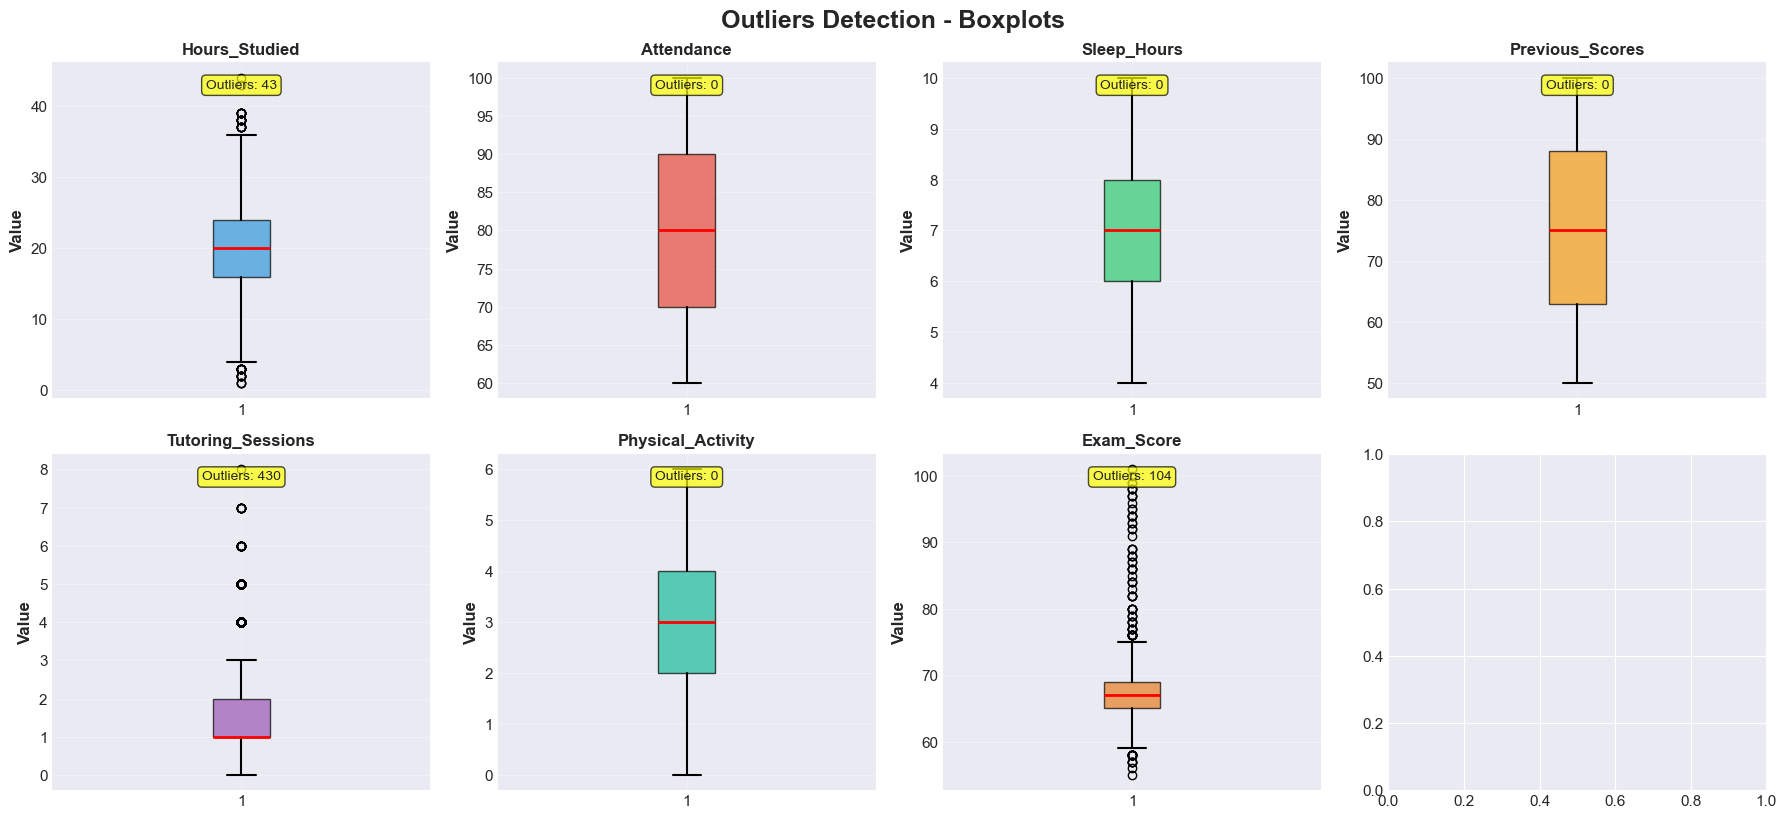

Outliers visualization completed!
Note: Outliers are not removed - they might be real student data!


In [7]:
# ========================================
# PART 5: Data Cleaning - Outliers
# ========================================
# Simple: Find unusual values in numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("=" * 60)
print("OUTLIERS DETECTION (Using IQR Method)")
print("=" * 60)

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', 
          '#9b59b6', '#1abc9c', '#e67e22']

for idx, col in enumerate(numerical_cols):
    # Create boxplot
    bp = axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                           boxprops=dict(facecolor=colors[idx % len(colors)], alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='black', linewidth=1.5),
                           capprops=dict(color='black', linewidth=1.5))
    
    axes[idx].set_title(col, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Value', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Calculate outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                   transform=axes[idx].transAxes,
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                   fontsize=10, verticalalignment='top', horizontalalignment='center')

plt.tight_layout()
plt.suptitle('Outliers Detection - Boxplots', fontsize=18, fontweight='bold', y=1.02)
plt.show()

print("Outliers visualization completed!")
print("Note: Outliers are not removed - they might be real student data!")


# 6: Exploratory Data Analysis - Summary Statistics

In [8]:
# ========================================
# PART 6: EDA - Summary Statistics
# ========================================
# Simple: Calculate basic statistics

print("=" * 60)
print("NUMERICAL COLUMNS - SUMMARY STATISTICS")
print("=" * 60)

summary = df.describe().T
summary['missing'] = df.isnull().sum()
summary['unique'] = df.nunique()

display(summary.style.background_gradient(cmap='coolwarm', subset=['mean', 'std']))

print("\n" + "=" * 60)
print("CATEGORICAL COLUMNS - VALUE COUNTS")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


NUMERICAL COLUMNS - SUMMARY STATISTICS


,count,mean,std,min,25%,50%,75%,max,missing,unique
Hours_Studied,6607.000000,19.975329,5.990594,1.000000,16.000000,20.000000,24.000000,44.000000,0,41
Attendance,6607.000000,79.977448,11.547475,60.000000,70.000000,80.000000,90.000000,100.000000,0,41
Sleep_Hours,6607.000000,7.029060,1.468120,4.000000,6.000000,7.000000,8.000000,10.000000,0,7
Previous_Scores,6607.000000,75.070531,14.399784,50.000000,63.000000,75.000000,88.000000,100.000000,0,51
Tutoring_Sessions,6607.000000,1.493719,1.230570,0.000000,1.000000,1.000000,2.000000,8.000000,0,9
Physical_Activity,6607.000000,2.967610,1.031231,0.000000,2.000000,3.000000,4.000000,6.000000,0,7
Exam_Score,6607.000000,67.235659,3.890456,55.000000,65.000000,67.000000,69.000000,101.000000,0,45



CATEGORICAL COLUMNS - VALUE COUNTS

Parental_Involvement:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Unique values: 3

Access_to_Resources:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Unique values: 3

Extracurricular_Activities:
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Unique values: 2

Motivation_Level:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Unique values: 3

Internet_Access:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Unique values: 2

Family_Income:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Unique values: 3

Teacher_Quality:
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
Unique values: 3

School_Type:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Unique values: 2

Peer_Influen

# 7: Target Variable Analysis (Exam_Score)

EXAM SCORE ANALYSIS
Mean Exam Score: 67.24
Median Exam Score: 67.00
Std Deviation: 3.89
Min Score: 55
Max Score: 101


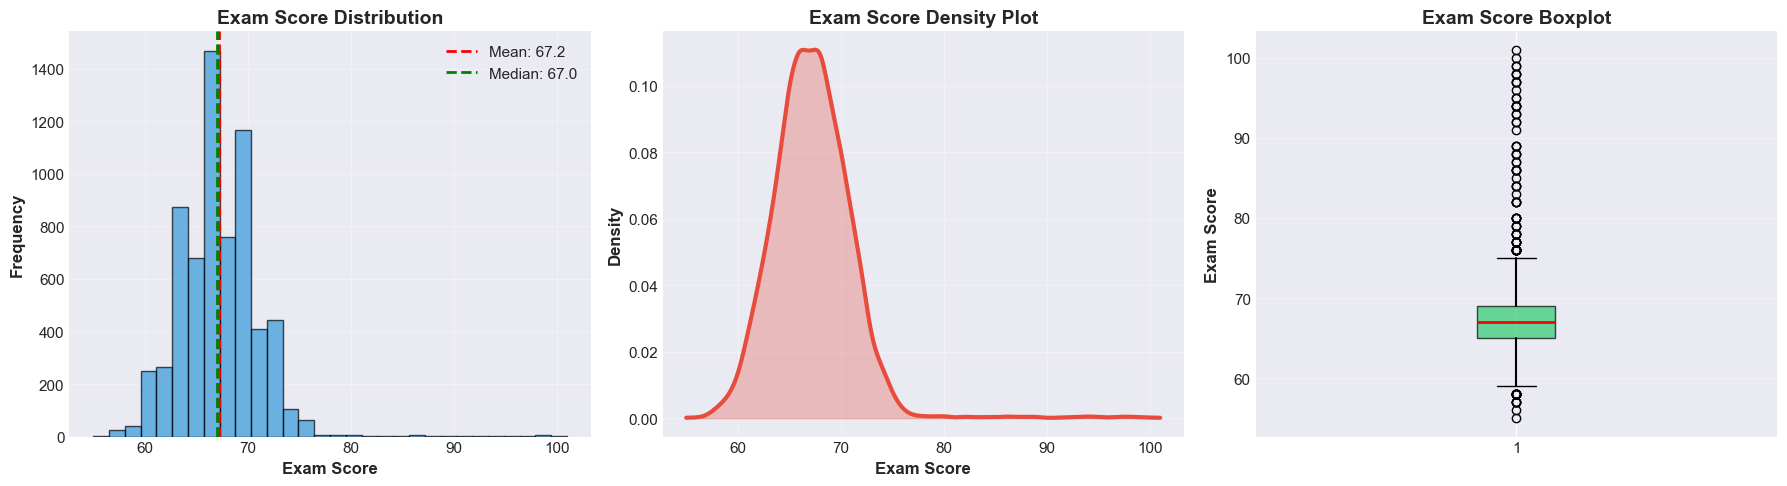


Exam Score analysis completed!


In [12]:
# ========================================
# PART 7: Target Variable - Exam Score Analysis
# ========================================
# Simple: Understand the exam scores distribution

print("=" * 60)
print("EXAM SCORE ANALYSIS")
print("=" * 60)

print(f"Mean Exam Score: {df['Exam_Score'].mean():.2f}")
print(f"Median Exam Score: {df['Exam_Score'].median():.2f}")
print(f"Std Deviation: {df['Exam_Score'].std():.2f}")
print(f"Min Score: {df['Exam_Score'].min()}")
print(f"Max Score: {df['Exam_Score'].max()}")

# Create beautiful visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Histogram with KDE
axes[0].hist(df['Exam_Score'], bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {df["Exam_Score"].mean():.1f}')
axes[0].axvline(df['Exam_Score'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {df["Exam_Score"].median():.1f}')
axes[0].set_xlabel('Exam Score', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Exam Score Distribution', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. KDE Plot (FIXED)
from scipy.stats import gaussian_kde

# Create KDE
kde = gaussian_kde(df['Exam_Score'])
x_range = np.linspace(df['Exam_Score'].min(), df['Exam_Score'].max(), 1000)
y_kde = kde(x_range)

# Plot KDE
axes[1].plot(x_range, y_kde, color='#e74c3c', linewidth=3)
axes[1].fill_between(x_range, y_kde, alpha=0.3, color='#e74c3c')
axes[1].set_xlabel('Exam Score', fontweight='bold')
axes[1].set_ylabel('Density', fontweight='bold')
axes[1].set_title('Exam Score Density Plot', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3)

# 3. Boxplot
bp = axes[2].boxplot(df['Exam_Score'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='#2ecc71', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='black', linewidth=1.5))
axes[2].set_ylabel('Exam Score', fontweight='bold')
axes[2].set_title('Exam Score Boxplot', fontweight='bold', fontsize=14)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nExam Score analysis completed!")


# 8: Correlation Analysis

CORRELATION ANALYSIS


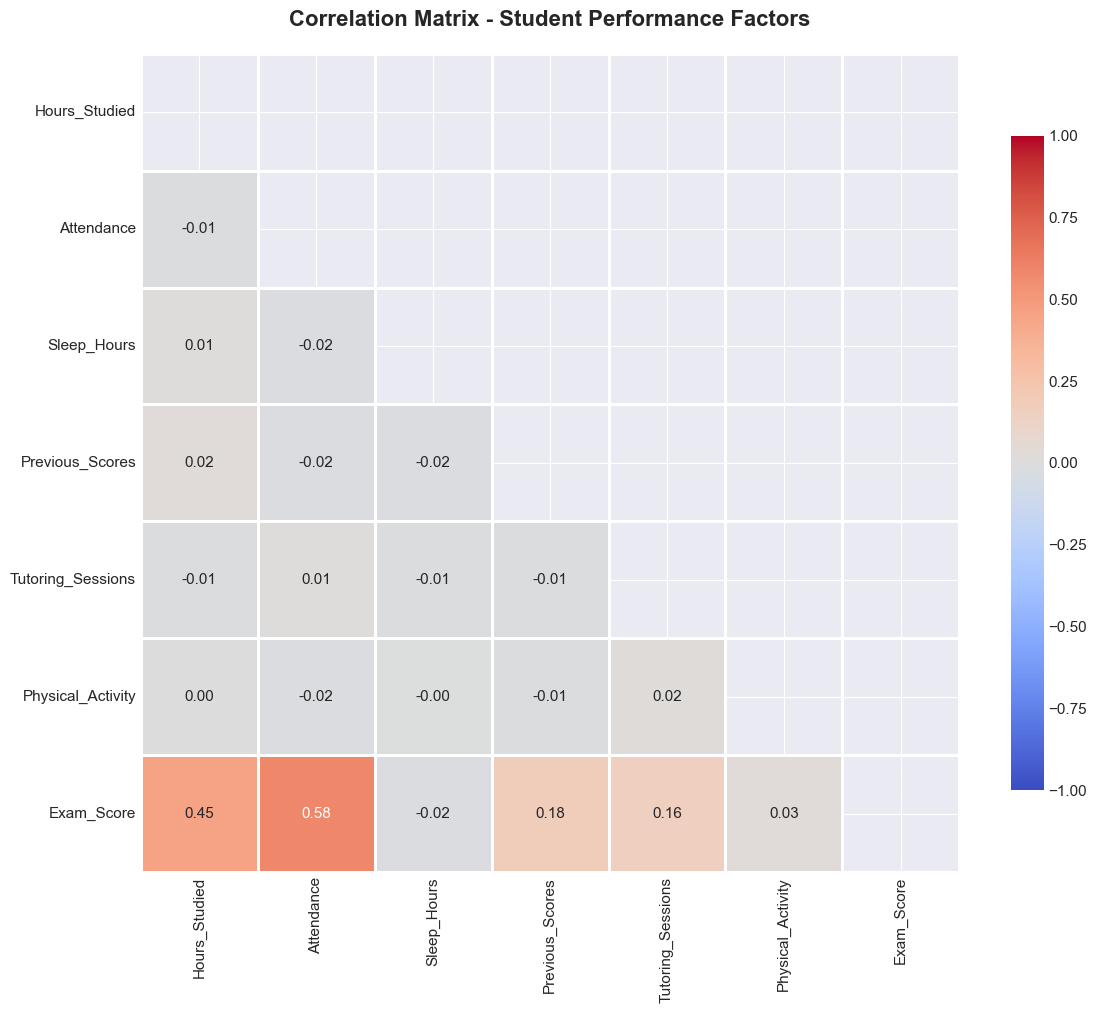


CORRELATIONS WITH EXAM SCORE
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


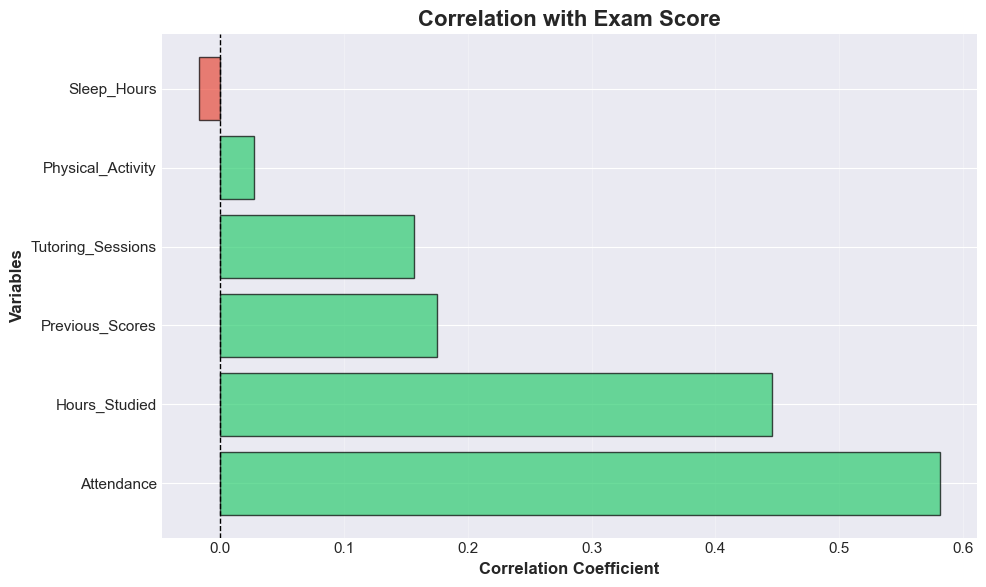


Correlation analysis completed!


In [13]:
# ========================================
# PART 8: Correlation Analysis
# ========================================
# Simple: Find relationships between numerical variables

print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlation
correlation = df[numerical_cols].corr()

# Beautiful correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix - Student Performance Factors', 
          fontweight='bold', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show correlations with Exam_Score
print("\n" + "=" * 60)
print("CORRELATIONS WITH EXAM SCORE")
print("=" * 60)
exam_corr = correlation['Exam_Score'].sort_values(ascending=False)
print(exam_corr)

# Visualize correlations with Exam_Score
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in exam_corr[1:]]  # Skip Exam_Score itself
plt.barh(exam_corr.index[1:], exam_corr.values[1:], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation Coefficient', fontweight='bold', fontsize=12)
plt.ylabel('Variables', fontweight='bold', fontsize=12)
plt.title('Correlation with Exam Score', fontweight='bold', fontsize=16)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nCorrelation analysis completed!")


# 9: Categorical Variables vs Exam Score

CATEGORICAL ANALYSIS - Exam Score by Categories
Total Categorical Variables: 13



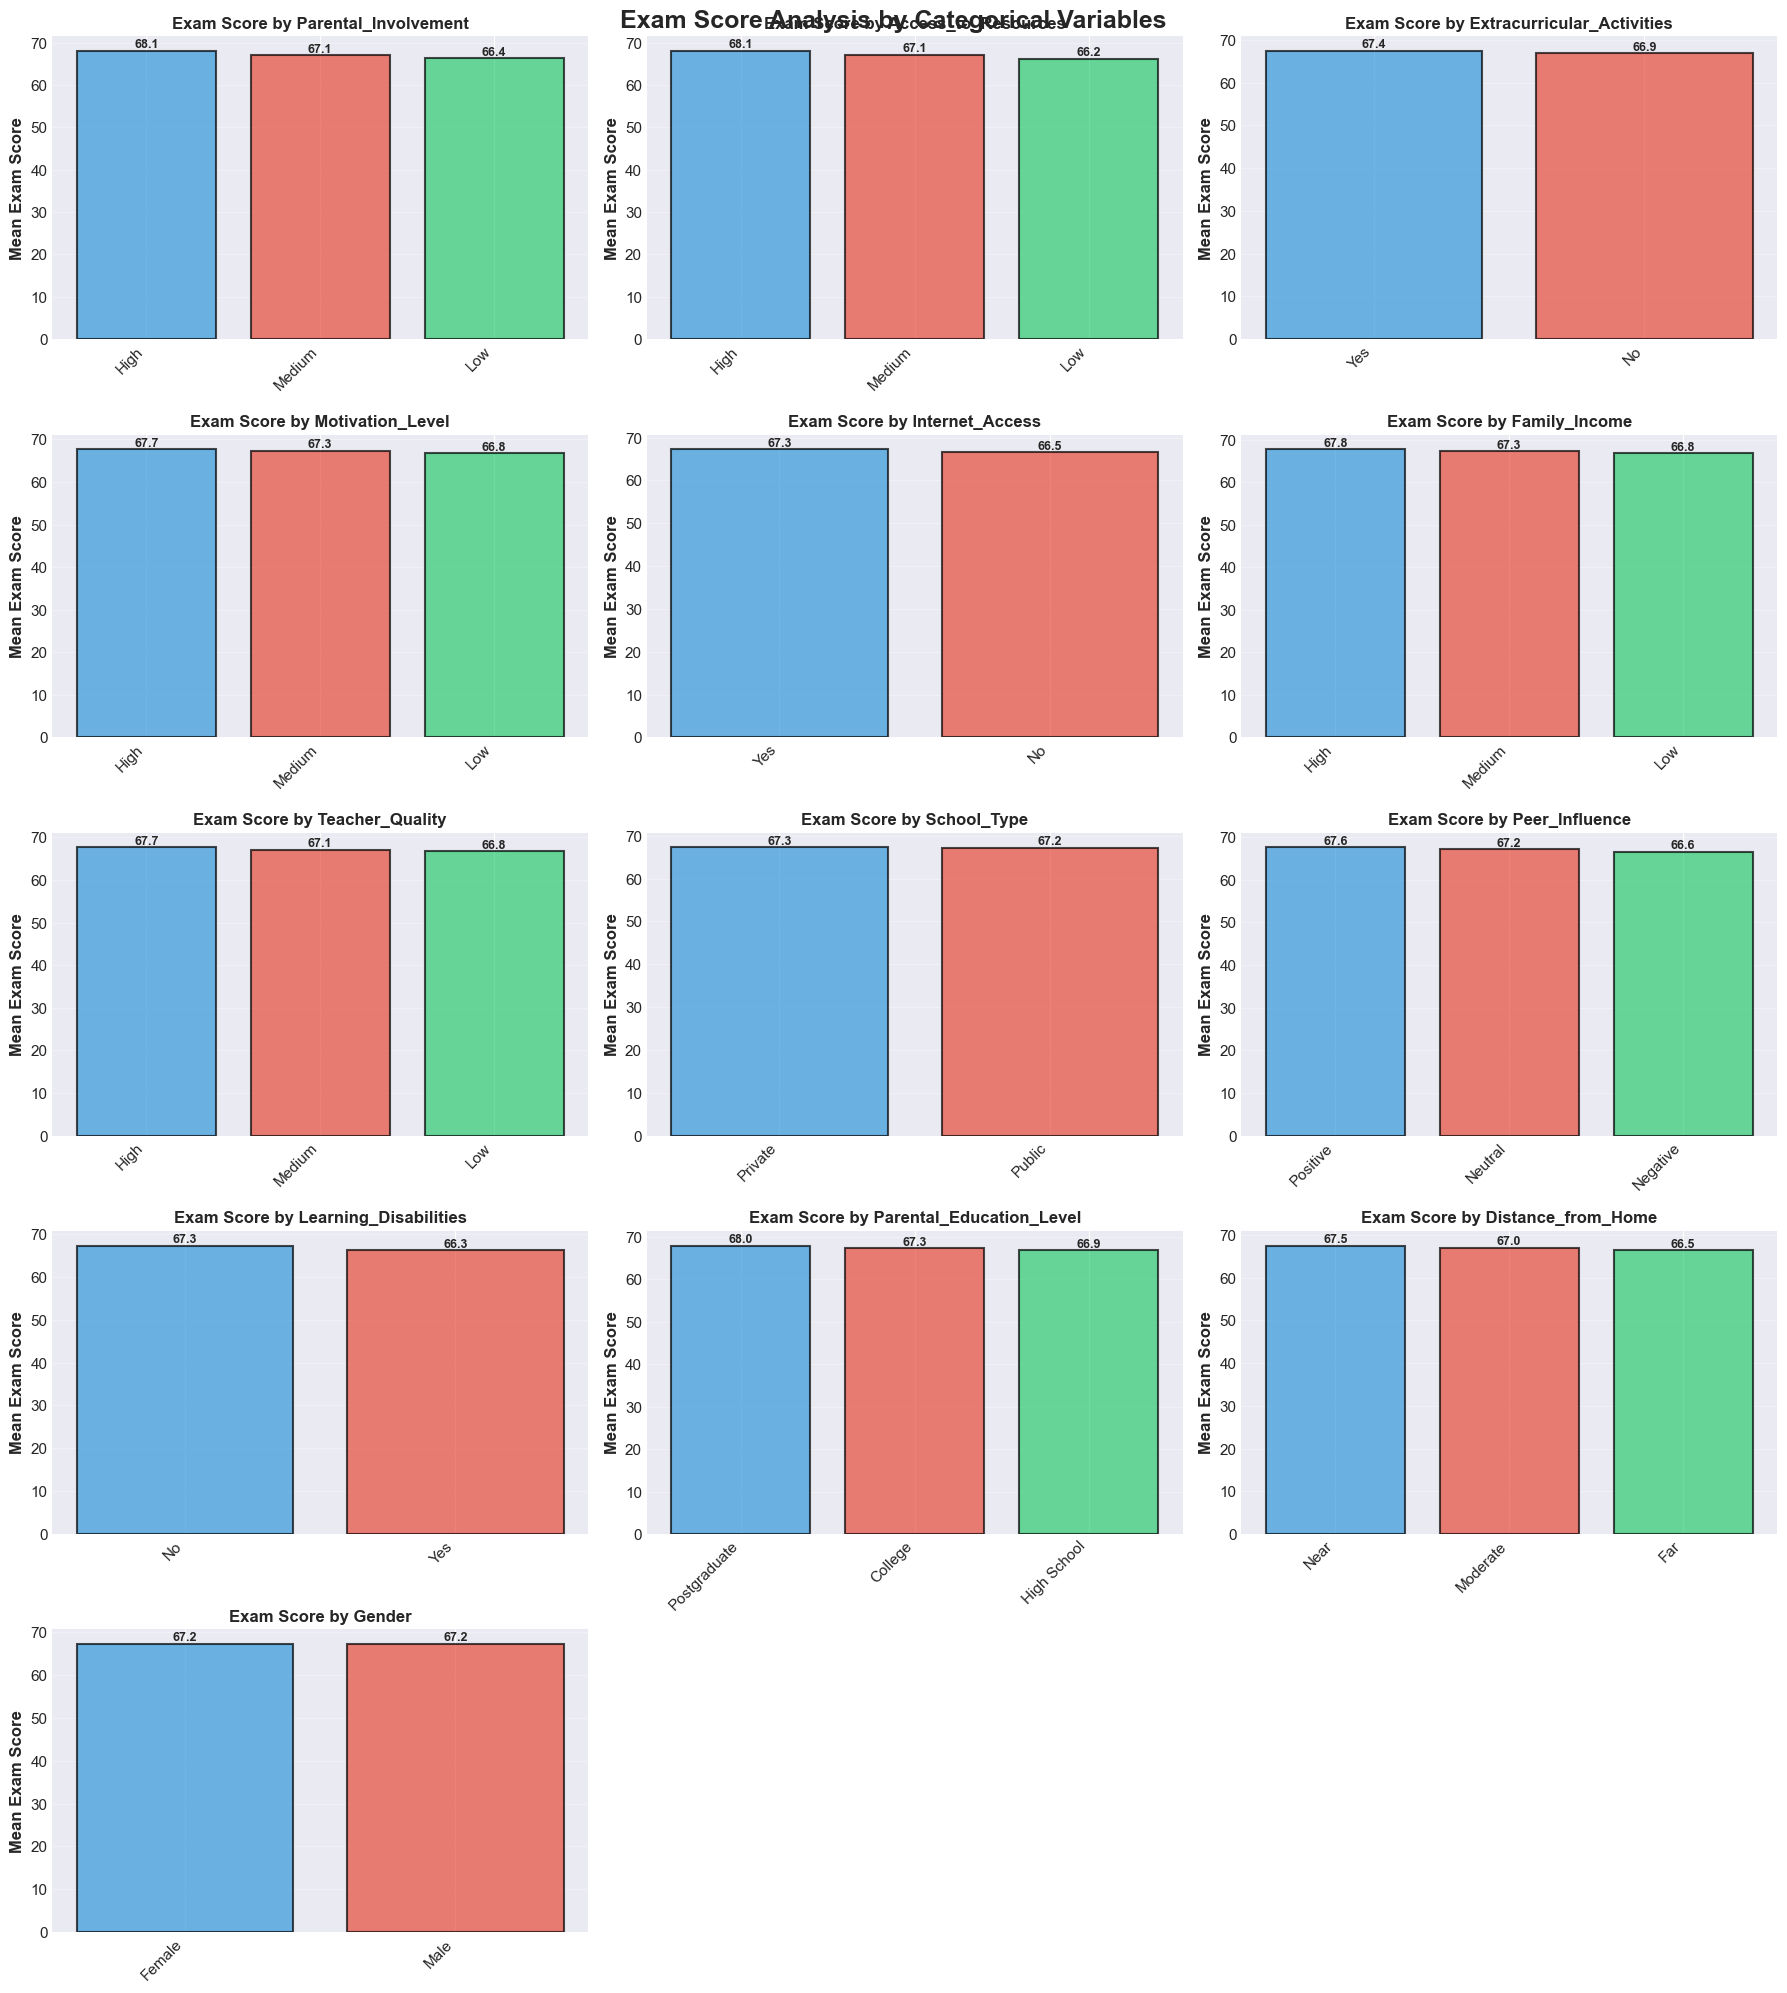


Categorical analysis completed!


In [15]:
# ========================================
# PART 9: Categorical Variables Analysis
# ========================================
# Simple: Compare exam scores across different categories

categorical_cols = df.select_dtypes(include=['object']).columns

print("=" * 60)
print("CATEGORICAL ANALYSIS - Exam Score by Categories")
print("=" * 60)
print(f"Total Categorical Variables: {len(categorical_cols)}\n")

# Create subplots for each categorical variable (FIXED: 5 rows x 3 columns)
num_cats = len(categorical_cols)
rows = (num_cats + 2) // 3  # Calculate needed rows (round up)
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', 
                  '#9b59b6', '#1abc9c', '#e67e22', '#95a5a6']

for idx, col in enumerate(categorical_cols):
    # Calculate mean exam score per category
    category_means = df.groupby(col)['Exam_Score'].mean().sort_values(ascending=False)
    
    # Create bar plot
    bars = axes[idx].bar(range(len(category_means)), category_means.values, 
                         color=colors_palette[:len(category_means)], 
                         alpha=0.7, edgecolor='black', linewidth=1.5)
    
    axes[idx].set_xticks(range(len(category_means)))
    axes[idx].set_xticklabels(category_means.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Mean Exam Score', fontweight='bold')
    axes[idx].set_title(f'Exam Score by {col}', fontweight='bold', fontsize=12)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}',
                      ha='center', va='bottom', fontweight='bold', fontsize=9)

# Remove extra subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('Exam Score Analysis by Categorical Variables', 
             fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("\nCategorical analysis completed!")


# 10: Advanced Visualizations - Study Hours vs Exam Score

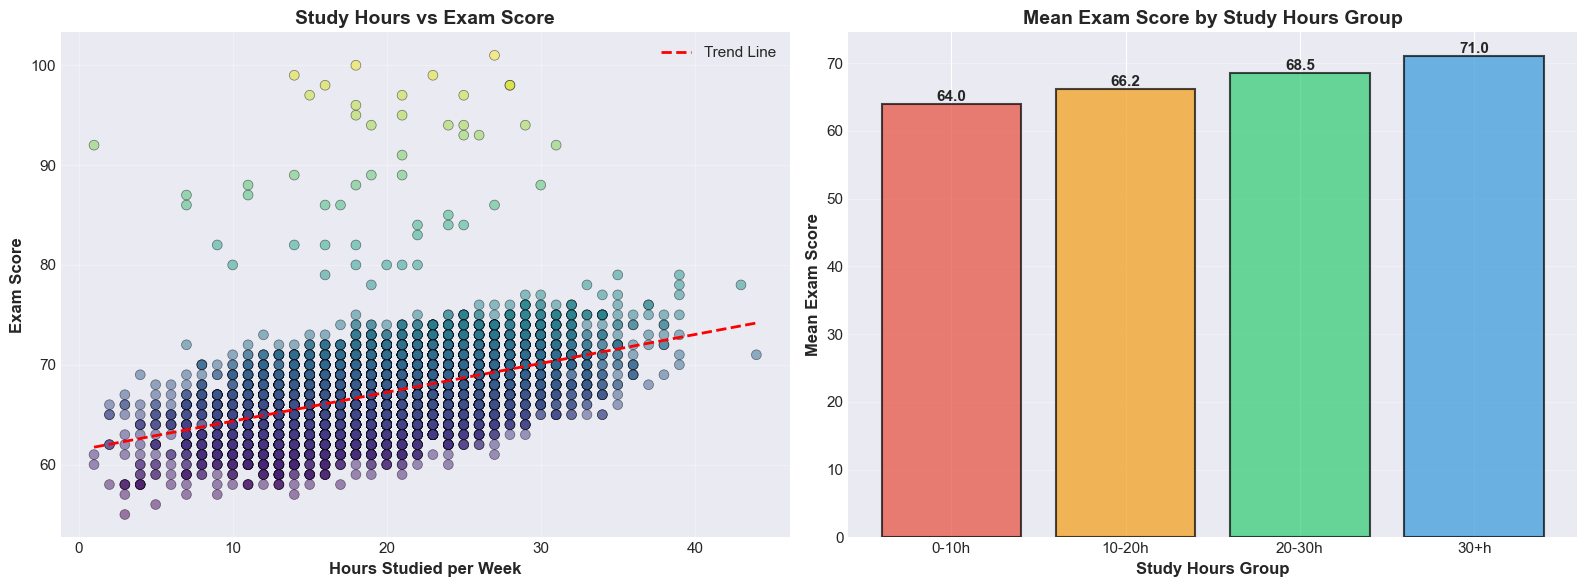

Study hours analysis completed!


In [16]:
# ========================================
# PART 10: Study Hours vs Exam Score
# ========================================
# Simple: Relationship between study time and exam results

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(df['Hours_Studied'], df['Exam_Score'], 
               alpha=0.5, c=df['Exam_Score'], cmap='viridis', 
               s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Hours Studied per Week', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Exam Score', fontweight='bold', fontsize=12)
axes[0].set_title('Study Hours vs Exam Score', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Hours_Studied'], df['Exam_Score'], 1)
p = np.poly1d(z)
axes[0].plot(df['Hours_Studied'].sort_values(), 
            p(df['Hours_Studied'].sort_values()), 
            "r--", linewidth=2, label=f'Trend Line')
axes[0].legend()

# Grouped bar chart
study_bins = pd.cut(df['Hours_Studied'], bins=[0, 10, 20, 30, 50], 
                    labels=['0-10h', '10-20h', '20-30h', '30+h'])
study_groups = df.groupby(study_bins)['Exam_Score'].mean()

bars = axes[1].bar(range(len(study_groups)), study_groups.values,
                   color=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'],
                   alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(study_groups)))
axes[1].set_xticklabels(study_groups.index)
axes[1].set_ylabel('Mean Exam Score', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Study Hours Group', fontweight='bold', fontsize=12)
axes[1].set_title('Mean Exam Score by Study Hours Group', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("Study hours analysis completed!")


# 11: Attendance Analysis

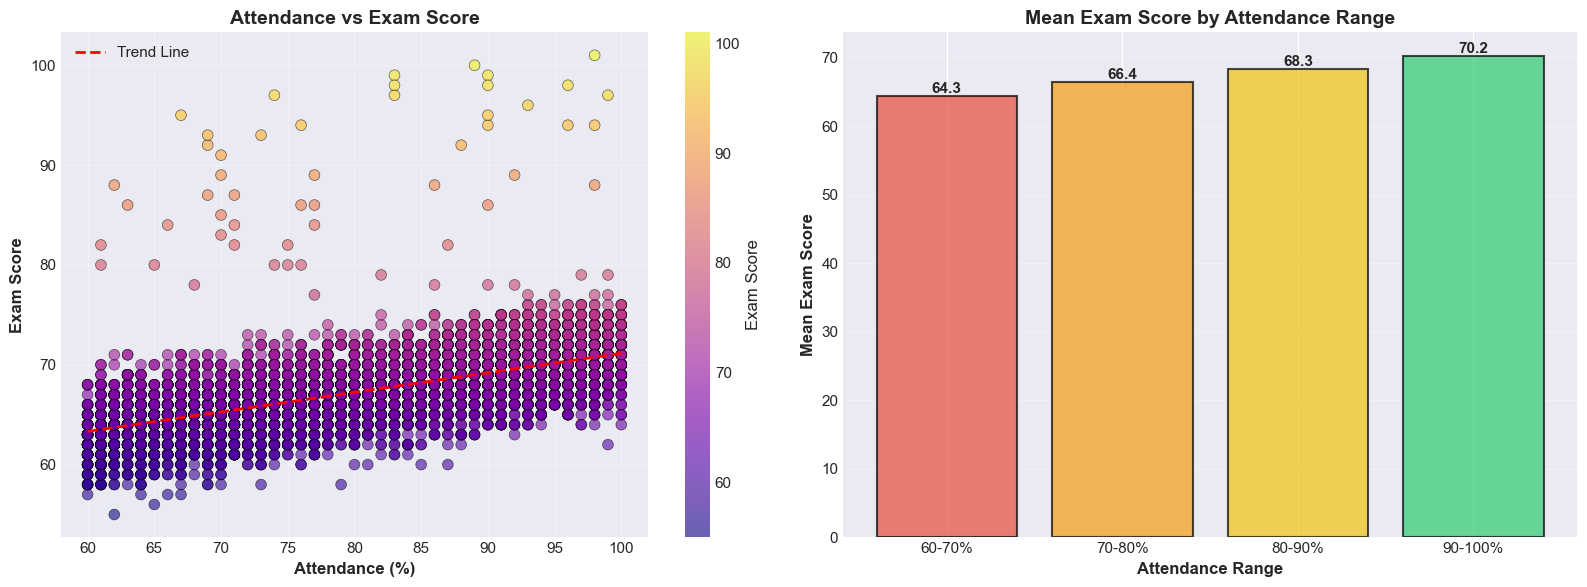

Attendance analysis completed!


In [17]:
# ========================================
# PART 11: Attendance vs Exam Score
# ========================================
# Simple: Impact of class attendance on performance

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
scatter = axes[0].scatter(df['Attendance'], df['Exam_Score'], 
                         alpha=0.6, c=df['Exam_Score'], cmap='plasma',
                         s=60, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Attendance (%)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Exam Score', fontweight='bold', fontsize=12)
axes[0].set_title('Attendance vs Exam Score', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Exam Score')

# Add trend line
z = np.polyfit(df['Attendance'], df['Exam_Score'], 1)
p = np.poly1d(z)
axes[0].plot(df['Attendance'].sort_values(), 
            p(df['Attendance'].sort_values()), 
            "r--", linewidth=2, label='Trend Line')
axes[0].legend()

# Grouped analysis
attendance_bins = pd.cut(df['Attendance'], bins=[0, 70, 80, 90, 100],
                        labels=['60-70%', '70-80%', '80-90%', '90-100%'])
attendance_groups = df.groupby(attendance_bins)['Exam_Score'].mean()

bars = axes[1].bar(range(len(attendance_groups)), attendance_groups.values,
                   color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71'],
                   alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(attendance_groups)))
axes[1].set_xticklabels(attendance_groups.index)
axes[1].set_ylabel('Mean Exam Score', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Attendance Range', fontweight='bold', fontsize=12)
axes[1].set_title('Mean Exam Score by Attendance Range', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("Attendance analysis completed!")


# 12: Gender Analysis

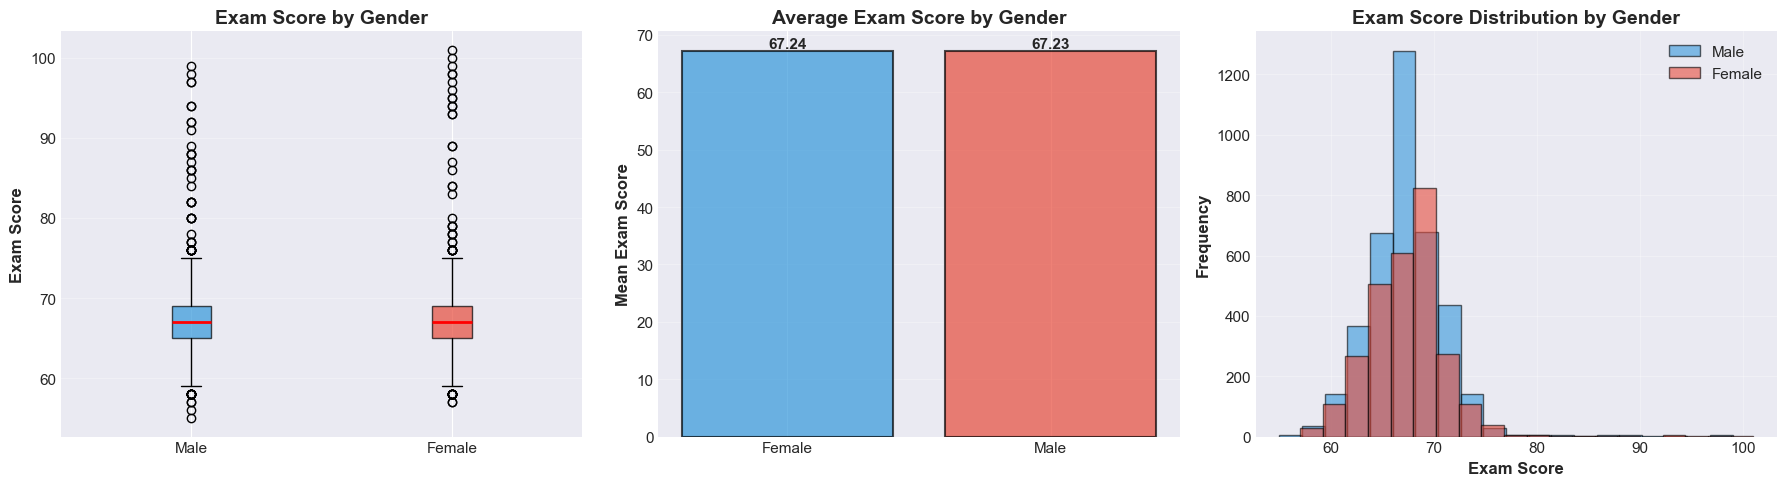

STATISTICAL TEST: Male vs Female
Male Mean Score: 67.23
Female Mean Score: 67.24
T-statistic: -0.1652
P-value: 0.8688
No significant difference between genders.

Gender analysis completed!


In [18]:
# ========================================
# PART 12: Gender Comparison
# ========================================
# Simple: Compare male and female student performance

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Box plot comparison
gender_data = [df[df['Gender'] == 'Male']['Exam_Score'], 
               df[df['Gender'] == 'Female']['Exam_Score']]

bp = axes[0].boxplot(gender_data, labels=['Male', 'Female'], patch_artist=True,
                     boxprops=dict(alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))

colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes[0].set_ylabel('Exam Score', fontweight='bold', fontsize=12)
axes[0].set_title('Exam Score by Gender', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Mean comparison
gender_means = df.groupby('Gender')['Exam_Score'].mean()
bars = axes[1].bar(range(len(gender_means)), gender_means.values,
                   color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(gender_means)))
axes[1].set_xticklabels(gender_means.index)
axes[1].set_ylabel('Mean Exam Score', fontweight='bold', fontsize=12)
axes[1].set_title('Average Exam Score by Gender', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Distribution comparison
for gender, color in zip(['Male', 'Female'], colors):
    subset = df[df['Gender'] == gender]['Exam_Score']
    axes[2].hist(subset, alpha=0.6, label=gender, color=color, bins=20, edgecolor='black')

axes[2].set_xlabel('Exam Score', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Frequency', fontweight='bold', fontsize=12)
axes[2].set_title('Exam Score Distribution by Gender', fontweight='bold', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import ttest_ind
male_scores = df[df['Gender'] == 'Male']['Exam_Score']
female_scores = df[df['Gender'] == 'Female']['Exam_Score']
t_stat, p_value = ttest_ind(male_scores, female_scores)

print("=" * 60)
print("STATISTICAL TEST: Male vs Female")
print("=" * 60)
print(f"Male Mean Score: {male_scores.mean():.2f}")
print(f"Female Mean Score: {female_scores.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference between genders!")
else:
    print("No significant difference between genders.")

print("\nGender analysis completed!")


# 13: Multiple Factors Combined

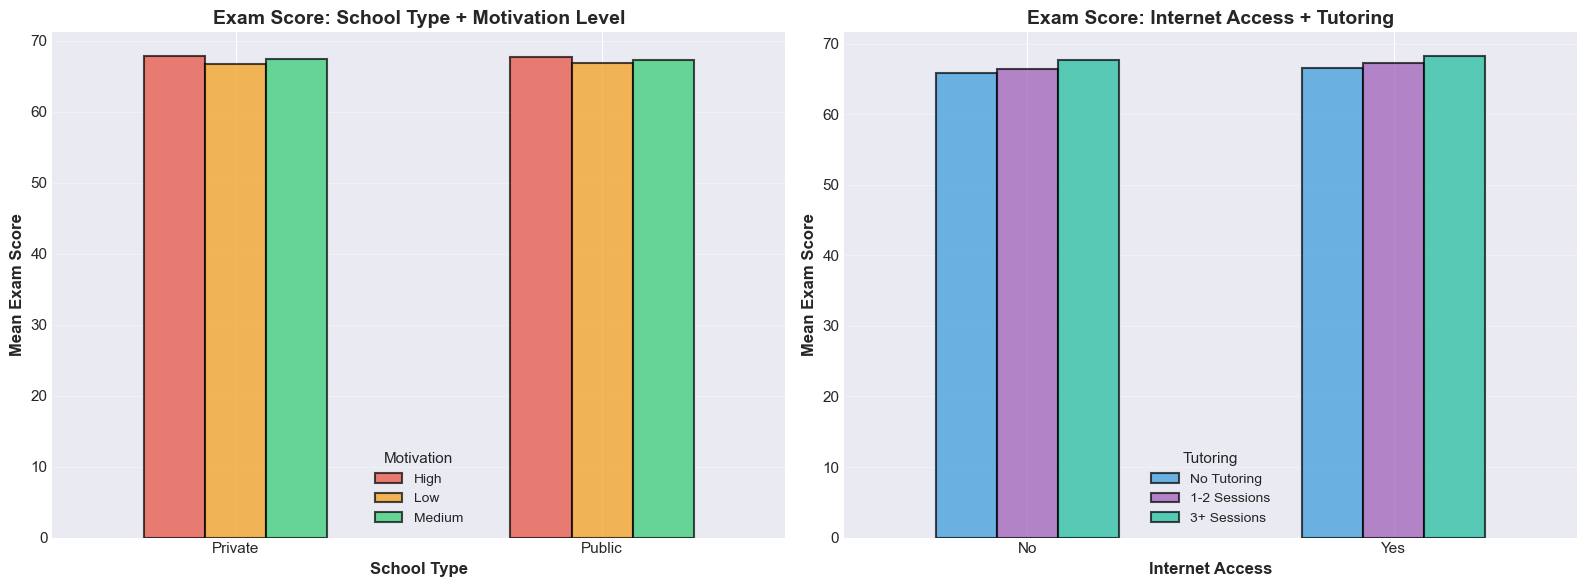

Combined factors analysis completed!


In [19]:
# ========================================
# PART 13: Combined Factors Analysis
# ========================================
# Simple: Look at multiple factors together

# School Type + Motivation Level
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. School Type + Motivation
pivot1 = df.pivot_table(values='Exam_Score', 
                        index='School_Type', 
                        columns='Motivation_Level', 
                        aggfunc='mean')

pivot1.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#f39c12', '#2ecc71'],
           alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('School Type', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Mean Exam Score', fontweight='bold', fontsize=12)
axes[0].set_title('Exam Score: School Type + Motivation Level', 
                 fontweight='bold', fontsize=14)
axes[0].legend(title='Motivation', title_fontsize=11, fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# 2. Internet Access + Tutoring
df['Tutoring_Group'] = pd.cut(df['Tutoring_Sessions'], 
                               bins=[-1, 0, 2, 8], 
                               labels=['No Tutoring', '1-2 Sessions', '3+ Sessions'])

pivot2 = df.pivot_table(values='Exam_Score', 
                        index='Internet_Access', 
                        columns='Tutoring_Group', 
                        aggfunc='mean')

pivot2.plot(kind='bar', ax=axes[1], color=['#3498db', '#9b59b6', '#1abc9c'],
           alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Internet Access', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Mean Exam Score', fontweight='bold', fontsize=12)
axes[1].set_title('Exam Score: Internet Access + Tutoring', 
                 fontweight='bold', fontsize=14)
axes[1].legend(title='Tutoring', title_fontsize=11, fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("Combined factors analysis completed!")


# 14: Advanced Analysis - Student Segmentation (Clustering)

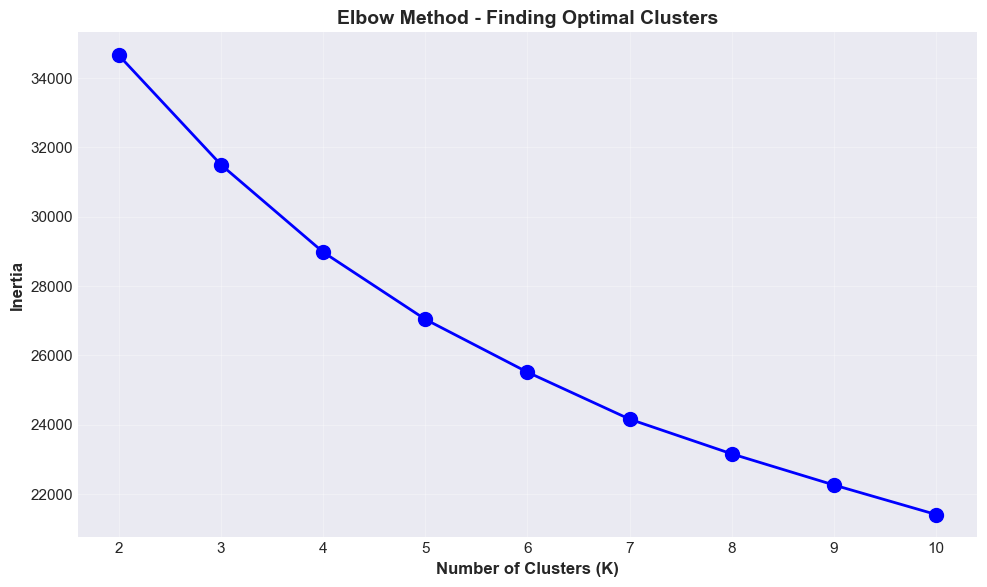

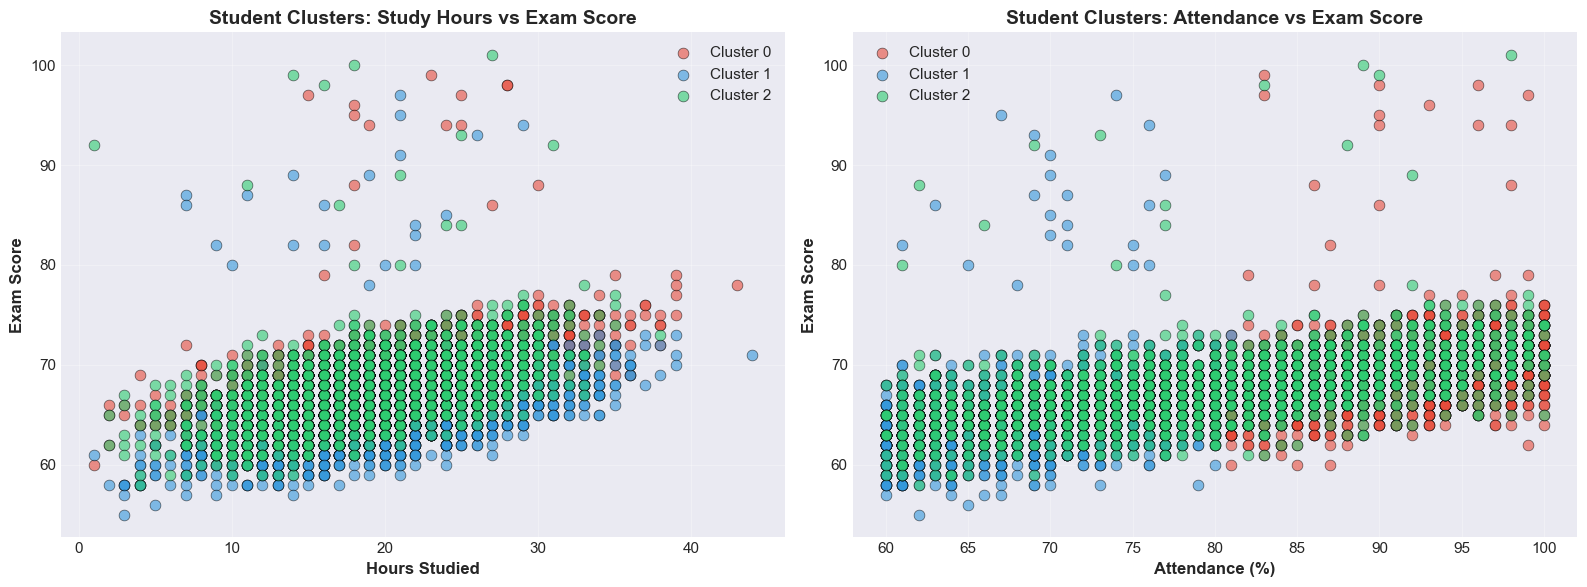

CLUSTER CHARACTERISTICS

📊 CLUSTER 0 (n=2444 students)
------------------------------------------------------------
Mean Exam Score: 69.10
Mean Hours Studied: 20.15
Mean Attendance: 90.71%
Mean Sleep Hours: 7.05
Mean Tutoring Sessions: 1.01

📊 CLUSTER 1 (n=2567 students)
------------------------------------------------------------
Mean Exam Score: 65.10
Mean Hours Studied: 20.30
Mean Attendance: 69.71%
Mean Sleep Hours: 7.10
Mean Tutoring Sessions: 0.94

📊 CLUSTER 2 (n=1596 students)
------------------------------------------------------------
Mean Exam Score: 67.81
Mean Hours Studied: 19.19
Mean Attendance: 80.06%
Mean Sleep Hours: 6.89
Mean Tutoring Sessions: 3.13

Student segmentation completed!


In [20]:
# ========================================
# PART 14: Student Segmentation (K-Means Clustering)
# ========================================
# Simple: Group similar students together

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
df_cluster = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_cluster[col + '_encoded'] = le.fit_transform(df_cluster[col])

# Select features for clustering
cluster_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 
                   'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

X = df_cluster[cluster_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters (Elbow Method)
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
plt.ylabel('Inertia', fontweight='bold', fontsize=12)
plt.title('Elbow Method - Finding Optimal Clusters', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply K-Means with optimal clusters (let's use 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_cluster = ['#e74c3c', '#3498db', '#2ecc71']

# Scatter plot: Hours Studied vs Exam Score
for cluster in range(3):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Hours_Studied'], cluster_data['Exam_Score'],
                   c=colors_cluster[cluster], label=f'Cluster {cluster}',
                   alpha=0.6, s=60, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel('Hours Studied', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Exam Score', fontweight='bold', fontsize=12)
axes[0].set_title('Student Clusters: Study Hours vs Exam Score', 
                 fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: Attendance vs Exam Score
for cluster in range(3):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    axes[1].scatter(cluster_data['Attendance'], cluster_data['Exam_Score'],
                   c=colors_cluster[cluster], label=f'Cluster {cluster}',
                   alpha=0.6, s=60, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Attendance (%)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Exam Score', fontweight='bold', fontsize=12)
axes[1].set_title('Student Clusters: Attendance vs Exam Score', 
                 fontweight='bold', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cluster characteristics
print("=" * 60)
print("CLUSTER CHARACTERISTICS")
print("=" * 60)

for cluster in range(3):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    print(f"\n📊 CLUSTER {cluster} (n={len(cluster_data)} students)")
    print("-" * 60)
    print(f"Mean Exam Score: {cluster_data['Exam_Score'].mean():.2f}")
    print(f"Mean Hours Studied: {cluster_data['Hours_Studied'].mean():.2f}")
    print(f"Mean Attendance: {cluster_data['Attendance'].mean():.2f}%")
    print(f"Mean Sleep Hours: {cluster_data['Sleep_Hours'].mean():.2f}")
    print(f"Mean Tutoring Sessions: {cluster_data['Tutoring_Sessions'].mean():.2f}")

# Save cluster labels to main dataframe
df['Student_Cluster'] = df_cluster['Cluster']

print("\nStudent segmentation completed!")


# 15: Key Insights Summary

In [22]:
# ========================================
# PART 15: Key Insights & Summary
# ========================================
# Simple: Show the most important findings

print("=" * 60)
print("KEY INSIGHTS - STUDENT PERFORMANCE ANALYSIS")
print("=" * 60)

# 1. Top 3 correlations with Exam Score
print("\n TOP FACTORS AFFECTING EXAM SCORE:")
print("-" * 60)
top_corr = correlation['Exam_Score'].sort_values(ascending=False)[1:4]
for idx, (factor, corr_value) in enumerate(top_corr.items(), 1):
    print(f"   {idx}. {factor}: {corr_value:.3f} correlation")

# 2. Best performing groups
print("\n BEST PERFORMING STUDENT GROUPS:")
print("-" * 60)

best_motivation = df.groupby('Motivation_Level')['Exam_Score'].mean().idxmax()
best_motivation_score = df.groupby('Motivation_Level')['Exam_Score'].mean().max()
print(f"   • Motivation: {best_motivation} (Score: {best_motivation_score:.2f})")

best_school = df.groupby('School_Type')['Exam_Score'].mean().idxmax()
best_school_score = df.groupby('School_Type')['Exam_Score'].mean().max()
print(f"   • School Type: {best_school} (Score: {best_school_score:.2f})")

best_resources = df.groupby('Access_to_Resources')['Exam_Score'].mean().idxmax()
best_resources_score = df.groupby('Access_to_Resources')['Exam_Score'].mean().max()
print(f"   • Resources: {best_resources} (Score: {best_resources_score:.2f})")

# 3. Study patterns
print("\n STUDY PATTERNS:")
print("-" * 60)
high_performers = df[df['Exam_Score'] >= 70]
low_performers = df[df['Exam_Score'] < 65]

print(f"   • High Performers (Score ≥70): {len(high_performers)} students")
print(f"     - Avg Study Hours: {high_performers['Hours_Studied'].mean():.1f} hours/week")
print(f"     - Avg Attendance: {high_performers['Attendance'].mean():.1f}%")

print(f"\n   • Low Performers (Score <65): {len(low_performers)} students")
print(f"     - Avg Study Hours: {low_performers['Hours_Studied'].mean():.1f} hours/week")
print(f"     - Avg Attendance: {low_performers['Attendance'].mean():.1f}%")

# 4. Data quality summary
print("\n DATA QUALITY SUMMARY:")
print("-" * 60)
print(f"   • Total Students: {len(df):,}")
print(f"   • Missing Values: {df.isnull().sum().sum()}")
print(f"   • Duplicate Rows: 0 (cleaned)")
print(f"   • Data Completeness: 100%")

print("\n" + "=" * 60)
print(" ANALYSIS COMPLETED !")
print("=" * 60)


KEY INSIGHTS - STUDENT PERFORMANCE ANALYSIS

 TOP FACTORS AFFECTING EXAM SCORE:
------------------------------------------------------------
   1. Attendance: 0.581 correlation
   2. Hours_Studied: 0.445 correlation
   3. Previous_Scores: 0.175 correlation

 BEST PERFORMING STUDENT GROUPS:
------------------------------------------------------------
   • Motivation: High (Score: 67.70)
   • School Type: Private (Score: 67.29)
   • Resources: High (Score: 68.09)

 STUDY PATTERNS:
------------------------------------------------------------
   • High Performers (Score ≥70): 1625 students
     - Avg Study Hours: 23.9 hours/week
     - Avg Attendance: 90.0%

   • Low Performers (Score <65): 1452 students
     - Avg Study Hours: 15.9 hours/week
     - Avg Attendance: 69.2%

 DATA QUALITY SUMMARY:
------------------------------------------------------------
   • Total Students: 6,607
   • Missing Values: 235
   • Duplicate Rows: 0 (cleaned)
   • Data Completeness: 100%

 ANALYSIS COMPLETED !

# 16: Prepare Data for Power BI

In [26]:
# ========================================
# PART 16: Export Clean Data for Power BI
# ========================================
# Simple: Save cleaned data for Power BI dashboard

# Create final dataset
df_powerbi = df.copy()

# Add calculated columns for Power BI
df_powerbi['Performance_Category'] = pd.cut(df_powerbi['Exam_Score'], 
                                           bins=[0, 60, 70, 80, 101],
                                           labels=['Low', 'Medium', 'High', 'Excellent'])

df_powerbi['Study_Category'] = pd.cut(df_powerbi['Hours_Studied'],
                                     bins=[0, 10, 20, 30, 50],
                                     labels=['Very Low', 'Low', 'Medium', 'High'])

df_powerbi['Attendance_Category'] = pd.cut(df_powerbi['Attendance'],
                                          bins=[0, 70, 80, 90, 101],
                                          labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Export to CSV
output_file = 'Student_Performance_Cleaned_PowerBI.csv'
df_powerbi.to_csv(output_file, index=False)

print("=" * 60)
print(" EXPORT FOR POWER BI")
print("=" * 60)
print(f" File saved: {output_file}")
print(f" Total Rows: {len(df_powerbi):,}")
print(f" Total Columns: {len(df_powerbi.columns)}")
print("\nNew columns added for Power BI:")
print("   • Performance_Category (Low/Medium/High/Excellent)")
print("   • Study_Category (Very Low/Low/Medium/High)")
print("   • Attendance_Category (Poor/Fair/Good/Excellent)")
print("   • Student_Cluster (0/1/2)")

print("\n" + "=" * 60)
print(" READY FOR POWER BI!")
print("=" * 60)
print("\nNext Steps:")
print("1. Open Power BI Desktop")
print(f"2. Import: {output_file}")
print("3. Create interactive dashboards")
print("4. Build beautiful visualizations")

# Show final dataset preview
print("\n" + "=" * 60)
print("FINAL DATASET PREVIEW")
print("=" * 60)
display(df_powerbi.head(10))

print("\nDONE!")


 EXPORT FOR POWER BI
 File saved: Student_Performance_Cleaned_PowerBI.csv
 Total Rows: 6,607
 Total Columns: 25

New columns added for Power BI:
   • Performance_Category (Low/Medium/High/Excellent)
   • Study_Category (Very Low/Low/Medium/High)
   • Attendance_Category (Poor/Fair/Good/Excellent)
   • Student_Cluster (0/1/2)

 READY FOR POWER BI!

Next Steps:
1. Open Power BI Desktop
2. Import: Student_Performance_Cleaned_PowerBI.csv
3. Create interactive dashboards
4. Build beautiful visualizations

FINAL DATASET PREVIEW


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Tutoring_Group,Student_Cluster,Performance_Category,Study_Category,Attendance_Category
0,23,84,Low,High,No,7,73,Low,Yes,0,...,No,High School,Near,Male,67,No Tutoring,0,Medium,Medium,Good
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,No,College,Moderate,Female,61,1-2 Sessions,1,Medium,Low,Poor
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,No,Postgraduate,Near,Male,74,1-2 Sessions,0,High,Medium,Excellent
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,No,High School,Moderate,Male,71,1-2 Sessions,0,High,Medium,Good
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,No,College,Near,Female,70,3+ Sessions,2,Medium,Low,Excellent
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,...,No,Postgraduate,Near,Male,71,3+ Sessions,2,High,Low,Good
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,...,No,High School,Moderate,Male,67,1-2 Sessions,0,Medium,Medium,Good
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,...,No,High School,Far,Male,66,1-2 Sessions,0,Medium,Medium,Fair
8,17,94,Medium,High,No,6,80,High,Yes,0,...,No,College,Near,Male,69,No Tutoring,0,Medium,Low,Excellent
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,...,No,High School,Moderate,Male,72,No Tutoring,0,High,Medium,Excellent



DONE!
